In [30]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [32]:
df.shape

(1516948, 17)

In [33]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [34]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

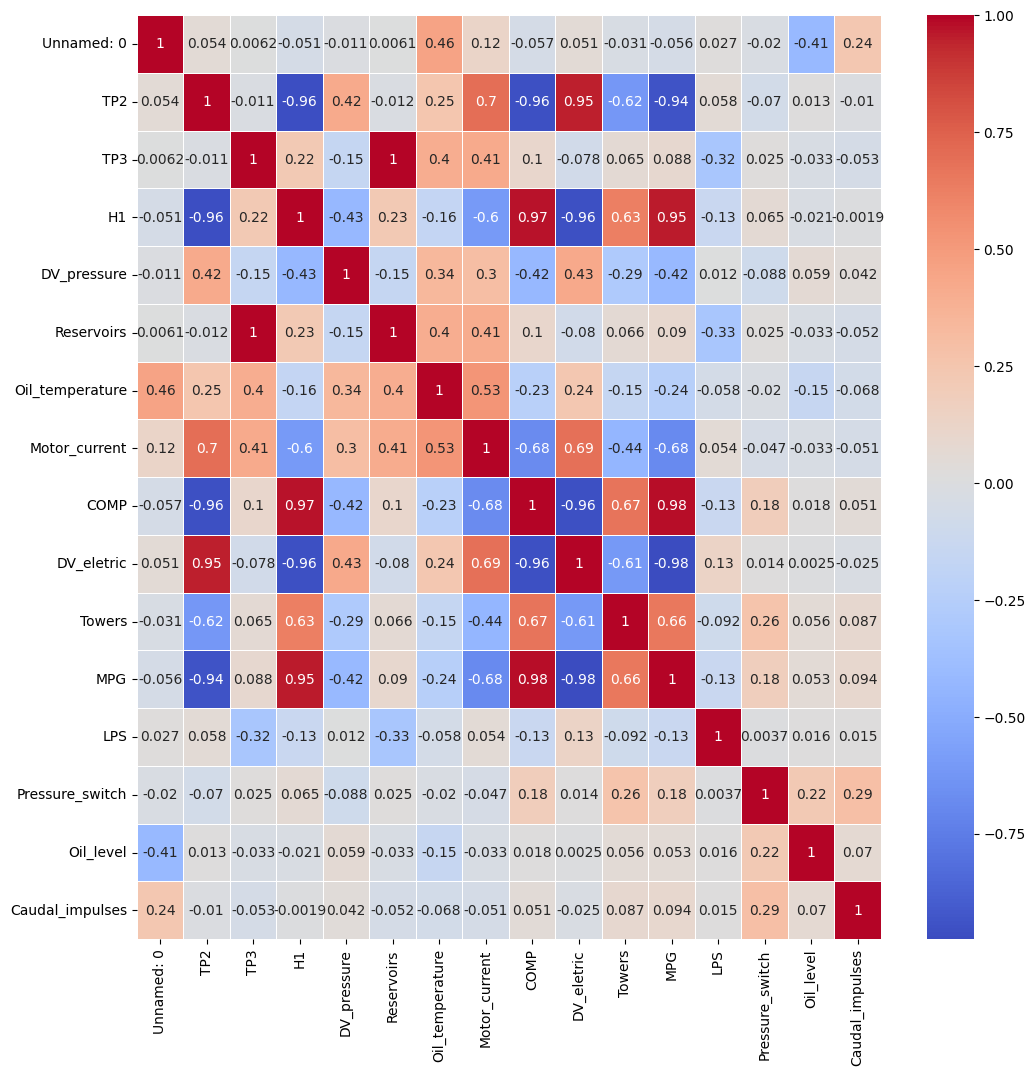

In [35]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [37]:
df.fillna(0, inplace=True)
le.fit(list(df['Towers']))
df['Towers_cat'] = df['Towers'].apply(lambda x: le.transform([x])[0])

In [38]:
df[['Towers_cat', 'Towers']]

,Towers_cat,Towers
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
1516943,1,1.0
1516944,1,1.0
1516945,1,1.0
1516946,1,1.0


In [39]:
Towers_cat_status = df["Towers_cat"].value_counts()
Towers_cat_status

Towers_cat
1    1395362
0     121586
Name: count, dtype: int64

<Axes: ylabel='count'>

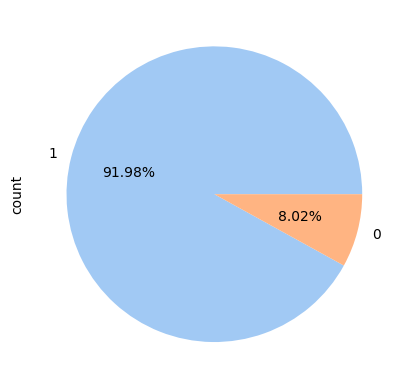

In [40]:
piec_colors = sns.color_palette('pastel')[0:len(Towers_cat_status)]
Towers_cat_status.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [41]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [42]:
X = df[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
Y = df['Towers_cat']

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.20)

In [44]:
X_train

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
65256,-0.008,8.878,8.862,-0.016,8.880,58.250,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1409954,-0.010,9.176,9.162,-0.020,9.176,65.575,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
674985,-0.012,9.670,9.656,-0.022,9.668,62.475,3.8200,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
160529,-0.012,8.864,8.848,-0.022,8.864,52.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
730739,5.792,7.442,-0.008,1.732,7.444,69.125,4.8600,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,8.904,8.474,-0.016,-0.024,8.474,69.650,5.7375,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1414414,-0.010,9.630,9.616,-0.020,9.632,67.450,3.8050,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
131932,-0.014,8.958,8.942,-0.016,8.960,57.075,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
671155,-0.016,8.752,8.740,-0.022,8.752,52.900,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [45]:
Y_train

65256      1
1409954    1
674985     1
160529     1
730739     1
          ..
259178     0
1414414    1
131932     1
671155     1
121958     1
Name: Towers_cat, Length: 1213558, dtype: int64

In [46]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 15), (303390, 15))

In [47]:
X_train_scaled

array([[-0.42318605, -0.16711887,  0.38810895, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.42380123,  0.29916609,  0.47811909, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.4244164 ,  1.07213511,  0.6263358 , ...,  0.09326079,
         0.32548128,  0.25944326],
       ...,
       [-0.42503157, -0.0419417 ,  0.41211165, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.42564674, -0.36427292,  0.35150482, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.42564674,  1.43201948,  0.69534358, ...,  0.09326079,
         0.32548128,  0.25944326]])

In [48]:
X_test_scaled

array([[-0.4244164 ,  0.25535408,  0.47031821, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.42564674,  1.35691317,  0.68154203, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.42564674, -0.91818189,  0.24529285, ...,  0.09326079,
         0.32548128,  0.25944326],
       ...,
       [-0.4244164 ,  1.34439546,  0.68094196, ...,  0.09326079,
         0.32548128, -3.85440734],
       [-0.42503157, -0.79613415,  0.26869548, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.42564674, -0.89314646,  0.25069346, ...,  0.09326079,
         0.32548128,  0.25944326]])

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [50]:
models = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [51]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in models.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(Y_train))
        best_model = classifier.best_estimator_

        Y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(Y_train), Y_train_predicted))
        train_mae = mean_absolute_error(list(Y_train), Y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        Y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(Y_test), Y_predicted))
        test_mae = mean_absolute_error(list(Y_test), Y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    Y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(Y_test) - Y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 3.250687596898036e-15 {}
RandomForestRegressor 0.0 {'max_depth': 1, 'n_estimators': 5}
XGBRegressor 9.018614960724722e-07 {'learning_rate': 0.1, 'n_estimators': 210}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=210, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


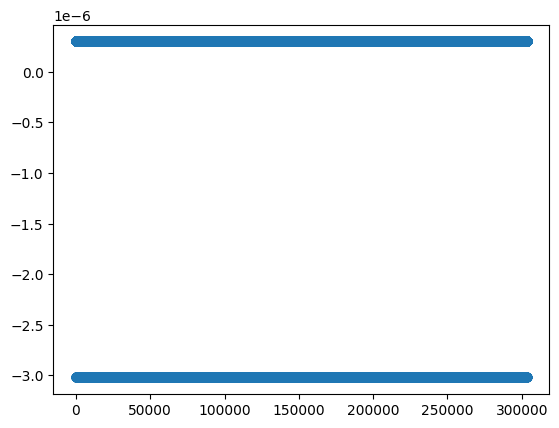

In [52]:
model_results = eval_models()

In [53]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.0,0.0,0.0,0.0,{}
RandomForestRegressor,0.0,0.0,0.0,0.0,"{'max_depth': 1, 'n_estimators': 5}"
XGBRegressor,0.000001,0.000001,0.000001,0.000001,"{'learning_rate': 0.1, 'n_estimators': 210}"
